In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

df = load_diabetes()
df_x = df.data
df_y = df.target

x_train, y_train , x_test, y_test = train_test_split(df_x,df_y,test_size = 0.2,shuffle=True, random_state = 1)

def model(x, w, b):
    y = sum((w * x).T) + b
    return y

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse
losses = []

w,b = 3,3
LEARNING_RATE=0.001

for i in range(1, 100001):
    dW, db = gradient(x_train, w, b, x_test)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, w, b, x_test)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 93950 : Loss 4587.6361
Iteration 93960 : Loss 4587.6361
Iteration 93970 : Loss 4587.6361
Iteration 93980 : Loss 4587.6361
Iteration 93990 : Loss 4587.6361
Iteration 94000 : Loss 4587.6361
Iteration 94010 : Loss 4587.6361
Iteration 94020 : Loss 4587.6361
Iteration 94030 : Loss 4587.6361
Iteration 94040 : Loss 4587.6361
Iteration 94050 : Loss 4587.6361
Iteration 94060 : Loss 4587.6361
Iteration 94070 : Loss 4587.6361
Iteration 94080 : Loss 4587.6361
Iteration 94090 : Loss 4587.6361
Iteration 94100 : Loss 4587.6361
Iteration 94110 : Loss 4587.6361
Iteration 94120 : Loss 4587.6361
Iteration 94130 : Loss 4587.6361
Iteration 94140 : Loss 4587.6361
Iteration 94150 : Loss 4587.6361
Iteration 94160 : Loss 4587.6361
Iteration 94170 : Loss 4587.6361
Iteration 94180 : Loss 4587.6361
Iteration 94190 : Loss 4587.6361
Iteration 94200 : Loss 4587.6361
Iteration 94210 : Loss 4587.6361
Iteration 94220 : Loss 4587.6361
Iteration 94230 : Loss 4587.6361
Iteration 94240 : Loss 4587.6361
Iteration

In [130]:
y_pred=model(y_train,w,b)

In [131]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

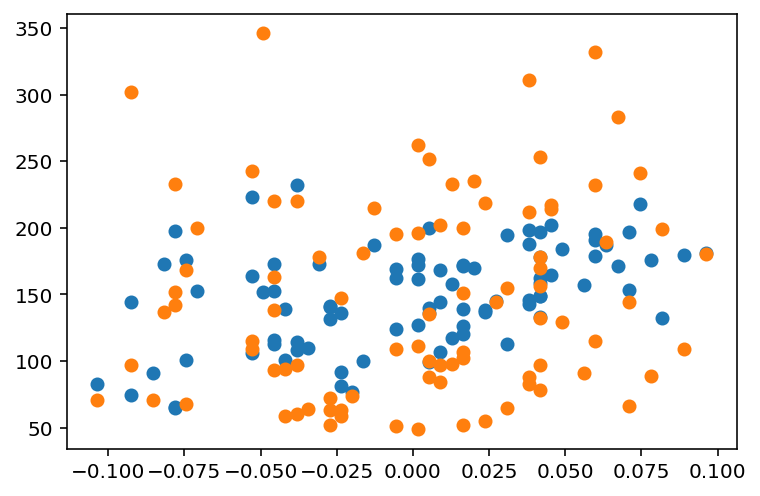

In [132]:
plt.scatter(y_train[:,0],y_pred)
plt.scatter(y_train[:,0],y_test)
plt.show()

In [4]:
import pandas as pd
df=pd.read_csv("bike_sharing_demand/train.csv")

In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [32]:
df["datetime"]=pd.to_datetime(df['datetime'])#,format = "%Y-%m-%d %H:%M:%S")
# dtime = np.array(dtime)

In [33]:

df['year']=df["datetime"].dt.year
df['month']=df["datetime"].dt.month
df['day']=df["datetime"].dt.day
df['hour']=df["datetime"].dt.hour
df['minute']=df["datetime"].dt.minute
df['second']=df["datetime"].dt.second

In [25]:
type(dtime[0])

numpy.datetime64

In [43]:
temp = df.copy()
x = temp.drop(['count','datetime'],axis=1)
y = df['count']

<AxesSubplot:xlabel='second', ylabel='count'>

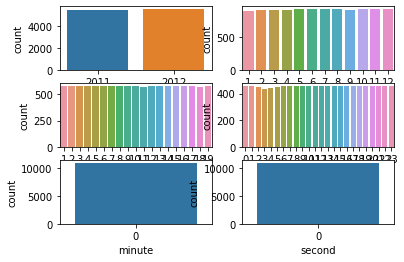

In [56]:
import seaborn as sns

fig, ax =plt.subplots(3,2)
sns.countplot(df['year'],ax=ax[0,0])
sns.countplot(df['month'],ax=ax[0,1])
sns.countplot(df['day'],ax=ax[1,0])
sns.countplot(df['hour'],ax=ax[1,1])
sns.countplot(df['minute'],ax=ax[2,0])
sns.countplot(df['second'],ax=ax[2,1])

In [54]:
type(ax)

numpy.ndarray

In [45]:
x_train, y_train , x_test, y_test = train_test_split(x,y,test_size = 0.2,shuffle=True, random_state = 1)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,x_test)

LinearRegression()

In [47]:
y_pred = model.predict(y_train)

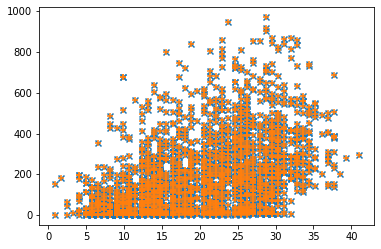

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_train['temp'],y_pred,marker='x')
plt.scatter(y_train['temp'],y_test,marker='+')
plt.show()

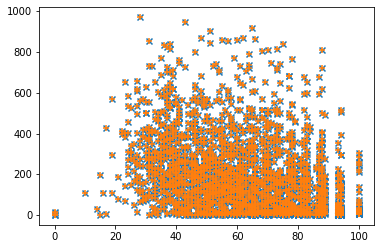

In [63]:
plt.scatter(y_train['humidity'],y_pred,marker='x')
plt.scatter(y_train['humidity'],y_test,marker='+')
plt.show()